<a href="https://colab.research.google.com/github/RomuloEstevamX/MachineLearningCarrerAlura/blob/main/Machine_Learn_PlusCare_Otimizando_modelos_com_hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz==0.9
!pip install pydot
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [140]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GroupKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV

In [3]:
uri = "https://raw.githubusercontent.com/RomuloEstevamX/MachineLearningCarrerAlura/main/Dados_pacientes.csv"
dados=  pd.read_csv(uri)
renomear = {
    'HeartRate': 'frequencia_cardiaca',
    'Temperature': 'temperatura',
    'SkinConductivity': 'condutibilidade_da_pele',
    'HealthStatus': 'saudavel'
}
dados = dados.rename(columns = renomear)
dados.head()

,frequencia_cardiaca,temperatura,condutibilidade_da_pele,saudavel
0,45.643128,34.291019,0.290423,0.0
1,87.744722,36.653927,1.017648,1.0
2,116.257441,38.750924,2.225993,0.0
3,88.045584,36.851377,0.727191,1.0
4,113.311699,37.326260,2.211978,0.0


In [24]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_chute = dados.sort_values("saudavel", ascending=True)
x_chute = dados_chute[["frequencia_cardiaca", "temperatura","condutibilidade_da_pele"]]
y_chute = dados_chute["saudavel"]
dados_chute.head()

,frequencia_cardiaca,temperatura,condutibilidade_da_pele,saudavel,modelo
0,45.643128,34.291019,0.290423,0.0,1
5632,44.885514,35.171874,0.324561,0.0,3
5631,138.109747,38.884280,1.705378,0.0,1
5628,39.108623,35.523254,0.298511,0.0,3
5627,53.486566,34.214225,0.276288,0.0,3


In [25]:
SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
resultados = cross_validate(modelo, x_chute, y_chute, cv = 10, return_train_score=False)
media = resultados['test_score'].mean()
desvio_padrao = resultados['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))


Accuracy com dummy stratified, 10 = [50.00, 50.00]


In [120]:
SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=1)
resultados = cross_validate(modelo, x_chute, y_chute, cv = 10, return_train_score=False)
media = resultados['test_score'].mean()
desvio_padrao = resultados['test_score'].std()
print("Acurácia com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))


Acurácia com cross validation, 10 = [100.00, 100.00]


In [69]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] =np.random.randint(0, 16, size=10000)
dados.saudavel = dados.saudavel + abs(dados.saudavel.min()) + 1
dados.head()
maximo = dados.modelo.min()

In [61]:

maximo

0

In [70]:
def imprime_resultados(resultados):
  media = resultados['test_score'].mean() * 100
  desvio = resultados['test_score'].std() * 100
  print("Acurácia médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [71]:
# GroupKFold em um pipeline com StandardScaler e SVC
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 2)
resultados = cross_validate(pipeline, x_chute, y_chute, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(resultados)

Acurácia médio 100.00
Intervalo [100.00, 100.00]


In [79]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits =10)
modelo = DecisionTreeClassifier(max_depth=1)
resultados = cross_validate(modelo, x_chute, y_chute, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(resultados)

Acurácia médio 100.00
Intervalo [100.00, 100.00]


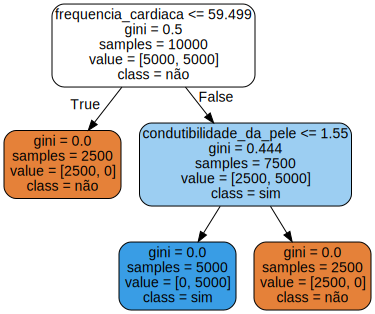

In [82]:
modelo.fit(x_chute, y_chute)
features = x_chute.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [121]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=1)
resultados = cross_validate(modelo, x_chute, y_chute, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(resultados)

Acurácia médio 74.33
Intervalo [72.89, 75.77]


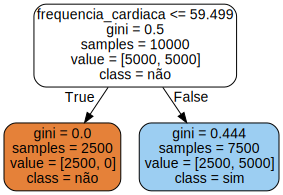

In [123]:
modelo.fit(x_chute, y_chute)
features = x_chute.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [125]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=1)
resultados = cross_validate(modelo, x_chute, y_chute, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(resultados)

Acurácia médio 74.33
Intervalo [72.89, 75.77]


In [126]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 2)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  resultados = cross_validate(modelo, x_chute, y_chute, cv = cv, groups = dados.saudavel, return_train_score=True)
  train_score = resultados['train_score'].mean() * 100
  test_score = resultados['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

Arvore max_depth = 1, treino = 75.67, teste = 74.33
Arvore max_depth = 2, treino = 100.00, teste = 100.00
Arvore max_depth = 3, treino = 100.00, teste = 100.00
Arvore max_depth = 4, treino = 100.00, teste = 100.00
Arvore max_depth = 5, treino = 100.00, teste = 100.00
Arvore max_depth = 6, treino = 100.00, teste = 100.00
Arvore max_depth = 7, treino = 100.00, teste = 100.00
Arvore max_depth = 8, treino = 100.00, teste = 100.00
Arvore max_depth = 9, treino = 100.00, teste = 100.00
Arvore max_depth = 10, treino = 100.00, teste = 100.00
Arvore max_depth = 11, treino = 100.00, teste = 100.00
Arvore max_depth = 12, treino = 100.00, teste = 100.00
Arvore max_depth = 13, treino = 100.00, teste = 100.00
Arvore max_depth = 14, treino = 100.00, teste = 100.00
Arvore max_depth = 15, treino = 100.00, teste = 100.00
Arvore max_depth = 16, treino = 100.00, teste = 100.00
Arvore max_depth = 17, treino = 100.00, teste = 100.00
Arvore max_depth = 18, treino = 100.00, teste = 100.00
Arvore max_depth = 19

,max_depth,train,test
0,1,75.67,74.33
1,2,100.00,100.00
2,3,100.00,100.00
3,4,100.00,100.00
4,5,100.00,100.00


<Axes: xlabel='max_depth', ylabel='train'>

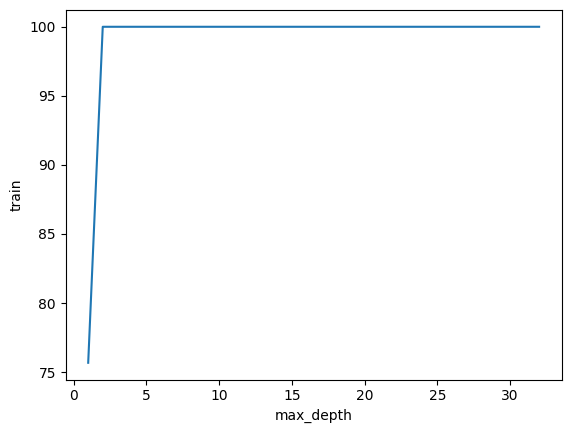

In [94]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)

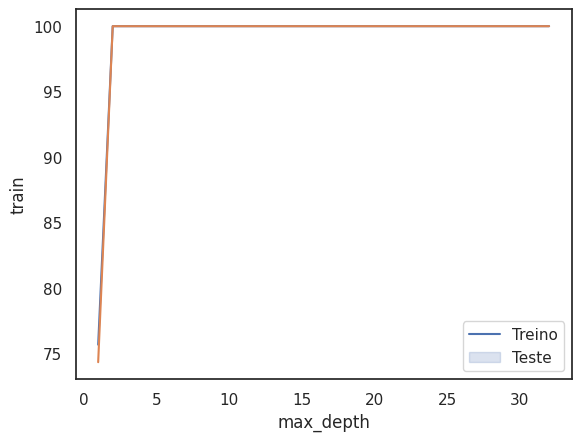

In [127]:
#TESTE DE OVERFIT, FICOU PERFEITO NO TREINO E RUIM NO TESTE
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [128]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
16,17,100.0,100.0
1,2,100.0,100.0
30,31,100.0,100.0
29,30,100.0,100.0
28,29,100.0,100.0


In [129]:
#EXPLORANDO HIPER PARAMETROS COM DUAS DIMENSOES: PROFUNDIDADE DA ARVORE E NUMERO DE ELEMENTOS DE SAMPLE

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 2)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  resultados = cross_validate(modelo, x_chute, y_chute, cv = cv, groups = dados.saudavel, return_train_score=True)
  train_score = resultados['train_score'].mean() * 100
  test_score = resultados['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.67, teste = 74.33
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.67, teste = 74.33
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.67, teste = 74.33
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.67, teste = 74.33
Arvore max_depth = 2, min_samples_leaf = 32, treino = 100.00, teste = 100.00
Arvore max_depth = 2, min_samples_leaf = 64, treino = 100.00, teste = 100.00
Arvore max_depth = 2, min_samples_leaf = 128, treino = 100.00, teste = 100.00
Arvore max_depth = 2, min_samples_leaf = 256, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 32, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 64, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 128, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 256, treino = 100.00, teste = 100.00
Arvore max_depth = 4, min_samples_leaf = 32, treino = 100.00, teste = 100.00
A

,max_depth,min_samples_leaf,train,test
0,1,32,75.67,74.33
1,1,64,75.67,74.33
2,1,128,75.67,74.33
3,1,256,75.67,74.33
4,2,32,100.00,100.00


In [130]:
# PRINTANDO EM FORMA DECRESCENTE PARA ENCONTRAR OS VALORES Q MAXIMIZAM O NOSSO ESTUDO DE TESTE
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
64,17,32,100.0,100.0
81,21,64,100.0,100.0
94,24,128,100.0,100.0
93,24,64,100.0,100.0
92,24,32,100.0,100.0


In [131]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,3.015113e-01,3.015113e-01
min_samples_leaf,-2.780775e-16,1.000000e+00,2.537327e-17,4.925650e-17
train,3.015113e-01,2.537327e-17,1.000000e+00,1.000000e+00
test,3.015113e-01,4.925650e-17,1.000000e+00,1.000000e+00


<Axes: >

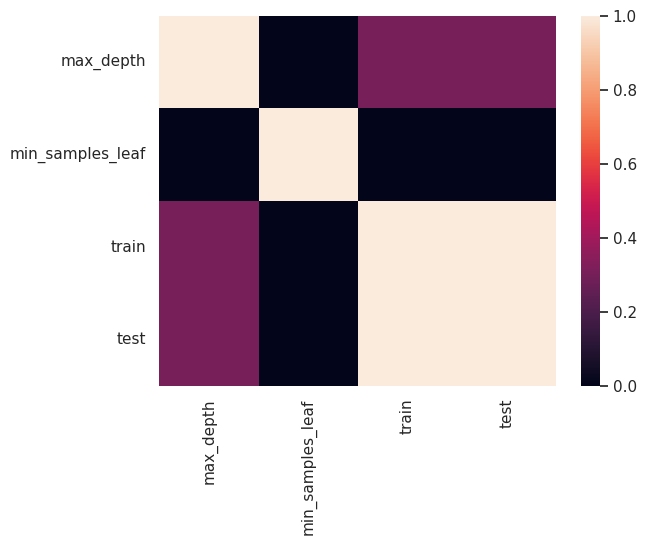

In [132]:
sns.heatmap(corr)

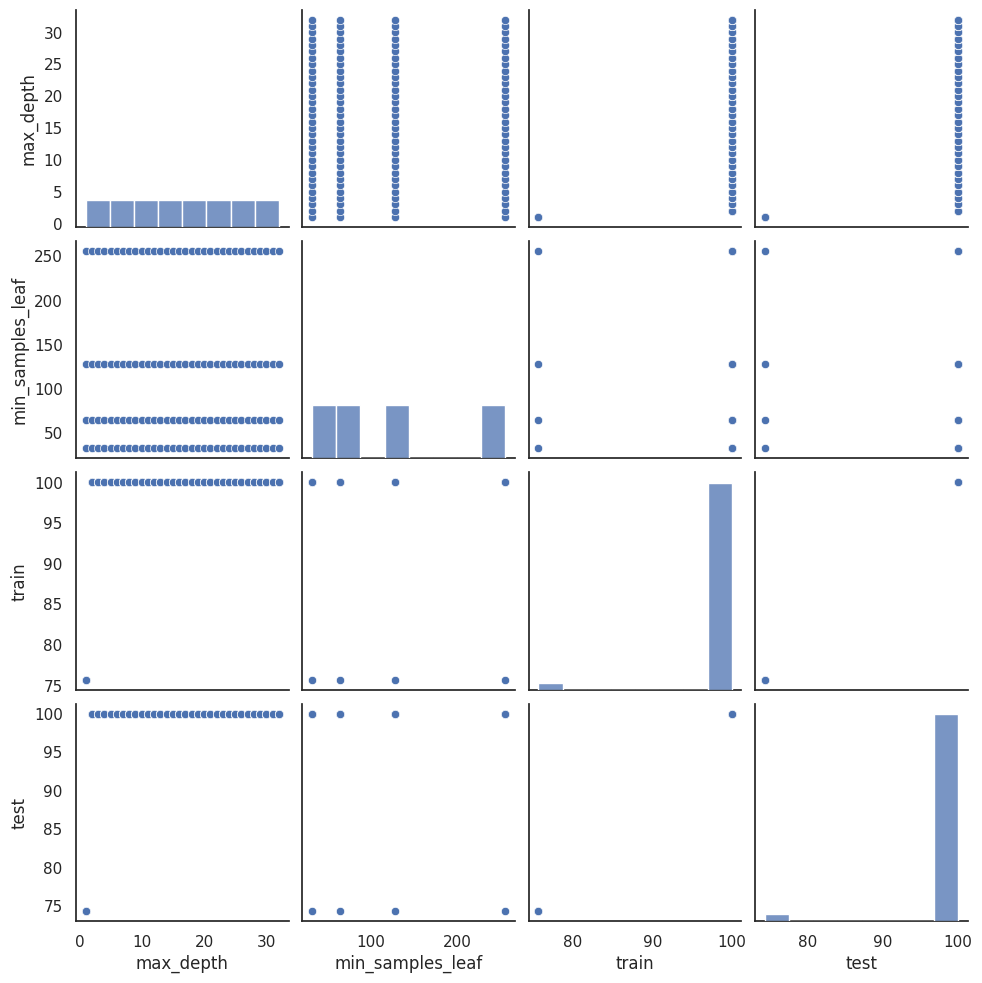

In [133]:
sns.pairplot(resultados)

<Axes: >

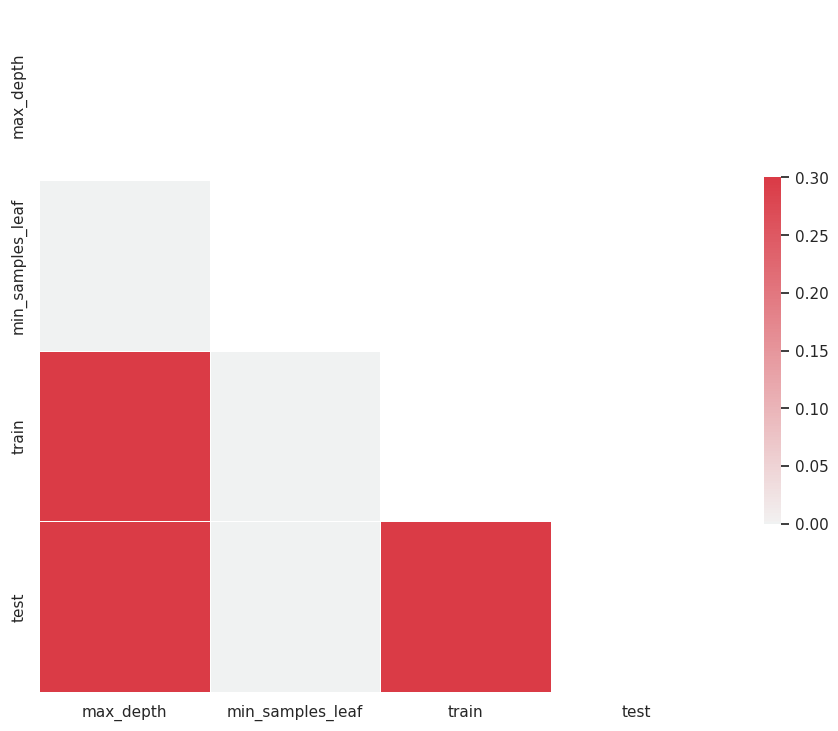

In [134]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados


resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.67, teste = 74.33
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.67, teste = 74.33
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.67, teste = 74.33
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.67, teste = 74.33
Arvore max_depth = 2, min_samples_leaf = 128, treino = 100.00, teste = 100.00
Arvore max_depth = 2, min_samples_leaf = 192, treino = 100.00, teste = 100.00
Arvore max_depth = 2, min_samples_leaf = 256, treino = 100.00, teste = 100.00
Arvore max_depth = 2, min_samples_leaf = 512, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 128, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 192, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 256, treino = 100.00, teste = 100.00
Arvore max_depth = 3, min_samples_leaf = 512, treino = 100.00, teste = 100.00
Arvore max_depth = 4, min_samples_leaf = 128, treino = 100.00, teste = 1

,max_depth,min_samples_leaf,train,test
0,1,128,75.67,74.33
1,1,192,75.67,74.33
2,1,256,75.67,74.33
3,1,512,75.67,74.33
4,2,128,100.00,100.00


In [106]:
corr = resultados.corr()

<Axes: >

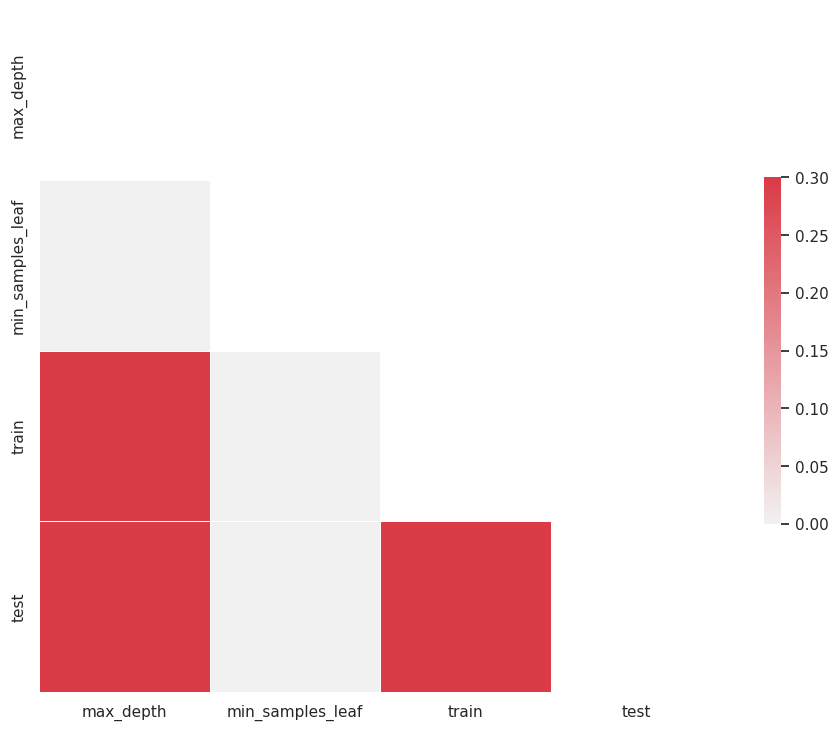

In [107]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [108]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
64,17,128,100.0,100.0
81,21,192,100.0,100.0
94,24,256,100.0,100.0
93,24,192,100.0,100.0
92,24,128,100.0,100.0


In [136]:
#EXPLORANDO HIPERPARAMETROS EM 3 DIMENSOES

def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  resultados = cross_validate(modelo, x_chute, y_chute, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = resultados['fit_time'].mean()
  score_time = resultados['score_time'].mean()
  train_score = resultados['train_score'].mean() * 100
  test_score = resultados['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []

  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split","train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.063017,74.328963,0.008095,0.002919
1,1,32,64,75.063017,74.328963,0.008219,0.002964
2,1,32,128,75.063017,74.328963,0.007642,0.002785
3,1,32,256,75.063017,74.328963,0.008421,0.002773
4,1,64,32,75.063017,74.328963,0.007790,0.002698


In [137]:
corr = resultados.corr()

<Axes: >

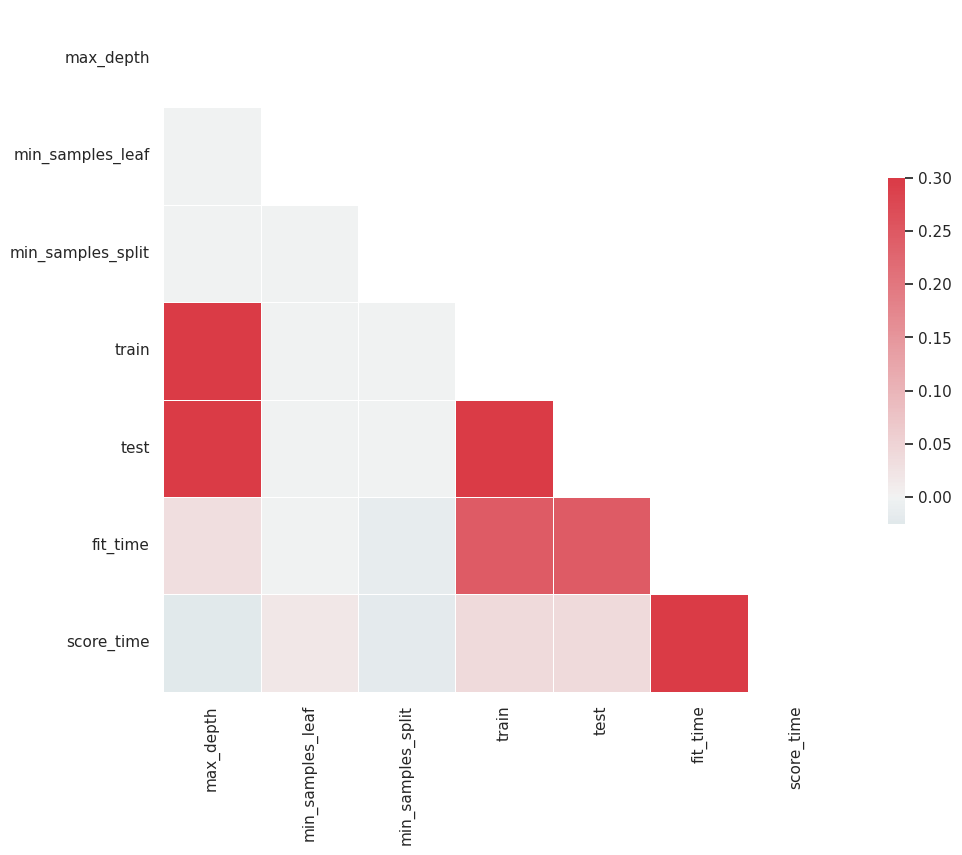

In [138]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [139]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
256,17,32,32,100.0,100.0,0.015672,0.004418
337,22,32,64,100.0,100.0,0.010782,0.002896
350,22,256,128,100.0,100.0,0.010194,0.002673
349,22,256,64,100.0,100.0,0.010574,0.002817
348,22,256,32,100.0,100.0,0.010753,0.002980


In [144]:
#EXPLORANDO ESPAÇO DE HIPER PARAMETROS COM O GRIDSEARCH
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [1, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 2))
busca.fit(x_chute, y_chute, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023344,0.005976,0.015852,0.002547,gini,1,32,32,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.74765,0.742749,0.7452,0.002451,19
1,0.038204,0.020023,0.015571,0.002138,gini,1,32,64,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.74765,0.742749,0.7452,0.002451,19
2,0.020585,0.011084,0.007328,0.001259,gini,1,32,128,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.74765,0.742749,0.7452,0.002451,19
3,0.011603,0.002506,0.006017,0.002071,gini,1,64,32,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.74765,0.742749,0.7452,0.002451,19
4,0.019704,0.005430,0.008802,0.002988,gini,1,64,64,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.74765,0.742749,0.7452,0.002451,19


In [145]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32}
100.0


In [ ]:
pd.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

In [116]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [118]:
predicoes = melhor.predict(x_chute)
accuracy = accuracy_score(predicoes, y_chute) * 100
print("Acurácia para os dados foi %.2f%%" % accuracy)

Acurácia para os dados foi 100.00%
